In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import scipy.io as sio

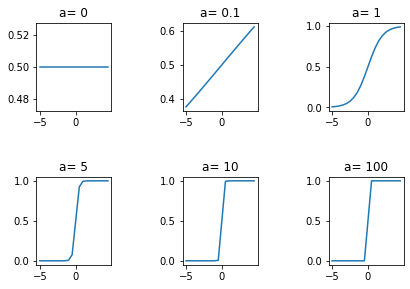

In [8]:
def f(z,a):
    return 1/(1+ np.exp(-a*z))

z = np.arange(-5.0,5.0,0.5) 
a = [0,0.1,1,5,10,100]

fig = plt.figure()
plt.subplot(231); plt.plot(z, f(z,a[0])); plt.title('a= %s' %a[0])
plt.subplot(232); plt.plot(z, f(z,a[1])); plt.title('a= %s' %a[1])
plt.subplot(233); plt.plot(z, f(z,a[2])); plt.title('a= %s' %a[2])
plt.subplot(234); plt.plot(z, f(z,a[3])); plt.title('a= %s' %a[3])
plt.subplot(235); plt.plot(z, f(z,a[4])); plt.title('a= %s' %a[4])
plt.subplot(236); plt.plot(z, f(z,a[5])); plt.title('a= %s' %a[5])
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.75, wspace=0.95)
plt.show()

## Exercise 3

In [9]:
Dataset = sio.loadmat('HW8.mat')
train_x = Dataset['train_x']
train_y= Dataset['train_y']

test_x = Dataset['test_x']
test_y = Dataset['test_y']

Visualize the data

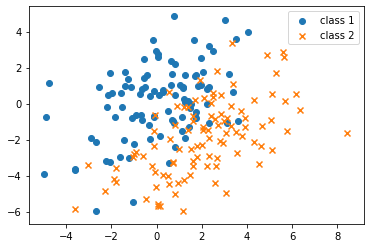

In [10]:
index_w1 = np.where(train_y==1)[0];
index_w2 = np.where(train_y==2)[0];

train_x_w1 = train_x[index_w1]
train_x_w2 = train_x[index_w2]

plt.scatter(train_x_w1[:,0],train_x_w1[:,1],marker='o',label='class 1')
plt.scatter(train_x_w2[:,0],train_x_w2[:,1],marker='x',label='class 2')
plt.legend()
plt.show()

### (a) Bayes classifier

In [11]:
p_w1 = len(train_x_w1)/len(train_x)
p_w2 = len(train_x_w2)/len(train_x)
p_w1, p_w2

(0.5, 0.5)

We model the distributions as normal

In [12]:
p_x_w1 = multivariate_normal(np.mean(train_x_w1,axis=0),np.cov(train_x_w1,rowvar=False))
p_x_w2 = multivariate_normal(np.mean(train_x_w2,axis=0),np.cov(train_x_w2,rowvar=False))

We classify the test data

In [17]:
scores_w1 = p_x_w1.pdf(test_x)*p_w1
scores_w2 = p_x_w2.pdf(test_x)*p_w2
scores = np.array([scores_w1,scores_w2]).T

In [20]:
Btest_y = np.argmax(scores,axis=1) + 1;

Estimate the error classification probability

In [21]:
p_errorB = 1 - (np.sum(Btest_y[...,None]==test_y))/len(test_y); p_errorB

0.15000000000000002

### (b) Naive Bayes classifier

Estimate the pdf of every feature vector

In [22]:
p_x1_w1 = norm(np.mean(train_x_w1[:,0]),np.sqrt(np.var(train_x_w1[:,0])))
p_x2_w1 = norm(np.mean(train_x_w1[:,1]),np.sqrt(np.var(train_x_w1[:,1])))

p_x1_w2 = norm(np.mean(train_x_w2[:,0]),np.sqrt(np.var(train_x_w2[:,0])))
p_x2_w2 = norm(np.mean(train_x_w2[:,1]),np.sqrt(np.var(train_x_w2[:,1])))

We classify the test data

In [23]:
scores_w1 = p_x1_w1.pdf(test_x[:,0])*p_x2_w1.pdf(test_x[:,1])
scores_w2 = p_x1_w2.pdf(test_x[:,0])*p_x2_w2.pdf(test_x[:,1])
scores = np.array([scores_w1,scores_w2]).T

In [24]:
NBtest_y = np.argmax(scores,axis=1) + 1

Estimate the error classification probability of Naive Bayes

In [25]:
p_errorNB = 1 - (np.sum(NBtest_y[...,None]==test_y))/len(test_y); p_errorNB

0.16500000000000004

### (c) kNN classifier

In [26]:
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(train_x,np.ravel(train_y))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
kNNtest_y = kNN.predict(test_x)

Estimate the error classification probability of kNN

In [28]:
p_errorkNN = 1 - (np.sum(kNNtest_y[...,None]==test_y))/len(test_y); p_errorkNN

0.17000000000000004

### (d) Logistic Regression classifier

In [29]:
logist = LogisticRegression(solver='lbfgs')
logist.fit(train_x,np.ravel(train_y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
logRegtest_y = logist.predict(test_x)

Estimate the error classification probability of Logistic Regression

In [31]:
p_errorLogReg = 1 - (np.sum(logRegtest_y[...,None]==test_y))/len(test_y); p_errorLogReg

0.15500000000000003